## 5.9 Regression 실습 - Bike Sharing Demand
### 데이터 클렌징 및 가공

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 한글 폰트 적용
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# https://www.kaggle.com/competitions/bike-sharing-demand/data
bike_df = pd.read_csv('train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32

| 열 이름       | 데이터 개수 | 데이터 타입 | 설명                                   |
|---------------|-------------|-------------|----------------------------------------|
| `datetime`    | 10886       | object      | 날짜                                   |
| `season`      | 10886       | int64       | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)|
| `holiday`     | 10886       | int64       | 휴일 여부 (1: 휴일, 0: 휴일 아님)      |
| `workingday`  | 10886       | int64       | 평일 여부 (1: 평일, 0: 평일 아님)      |
| `weather`     | 10886       | int64       | 날씨 상태 (1: 맑음, 2: 흐림, 3: 약한 눈/비, 4: 심한 눈/비) |
| `temp`        | 10886       | float64     | 온도                                   |
| `atemp`       | 10886       | float64     | 체감 온도                              |
| `humidity`    | 10886       | int64       | 습도                                   |
| `windspeed`   | 10886       | float64     | 풍속                                   |
| `casual`      | 10886       | int64       | 비회원 렌탈 횟수                       |
| `registered`  | 10886       | int64       | 회원 렌탈 횟수                         |
| `count`       | 10886       | int64       | 총 대여 횟수                           |


 자전거 빌려 타기에 뭐가 좋을지 날씨가 괜찮고 일하는 날보다 평일이 많지는 않을까
 의문1. 자전거 타기 좋은 날씨?
 의문2. 휴무일과 평일의 자전거 타기 어느쪽이 더 좋을지
 의문3. 

In [66]:
# 문자열을 datetime 타입으로 변경.
print(type(bike_df['datetime']))
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime) # 문자열로 되있다면 관련 로그가 출력되지 않는다.
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

<class 'pandas.core.series.Series'>


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2

In [67]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [68]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


C:\Users\302\AppData\Local\Temp\ipykernel_6424\2078585566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=season_avg_rentals, palette='coolwarm')


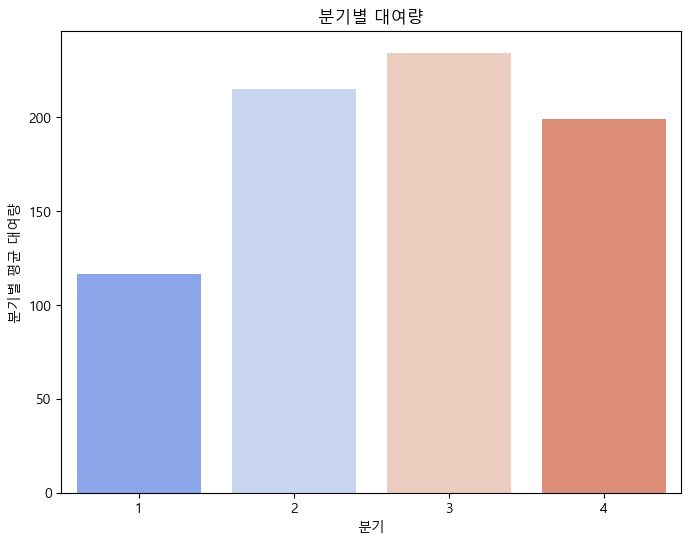

In [69]:
# season별 평균 대여량 계산
season_avg_rentals = bike_df.groupby('season')['count'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='count', data=season_avg_rentals, palette='coolwarm')
plt.title('분기별 대여량')
plt.xlabel('분기')
plt.ylabel('분기별 평균 대여량')
plt.show()

분기별 실적으로 야외에서 진행되는 자전거 대여를 나눈기에 적절하지 않아 보임

C:\Users\302\AppData\Local\Temp\ipykernel_6424\572571707.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new_season', y='count', data=season_counts, order=['봄', '여름', '가을', '겨울'], palette=custom_palette)


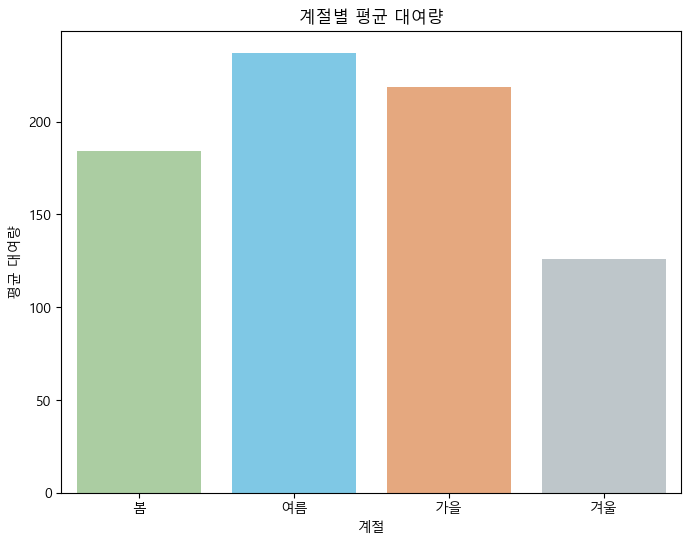

In [70]:
# month를 기준으로 계절로 변환환

# 보편적적 기준으로 계절 정의
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

bike_df['new_season'] = bike_df['month'].apply(get_season)

# 계절느낌 나는 색상
custom_palette = ['#A7D49B', '#6ECFF6', '#F6A56E', '#BCC6CC']  # 봄, 여름, 가을, 겨울 색상

# 계절별 대여량 평균 계산
season_counts = bike_df.groupby('new_season')['count'].mean().reset_index()

# 계절별 대여량 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='new_season', y='count', data=season_counts, order=['봄', '여름', '가을', '겨울'], palette=custom_palette)
plt.title('계절별 평균 대여량')
plt.xlabel('계절')
plt.ylabel('평균 대여량')
plt.show()




분기별 대여량보다 내가 느끼기엔 좀 더 설득력 있어보임

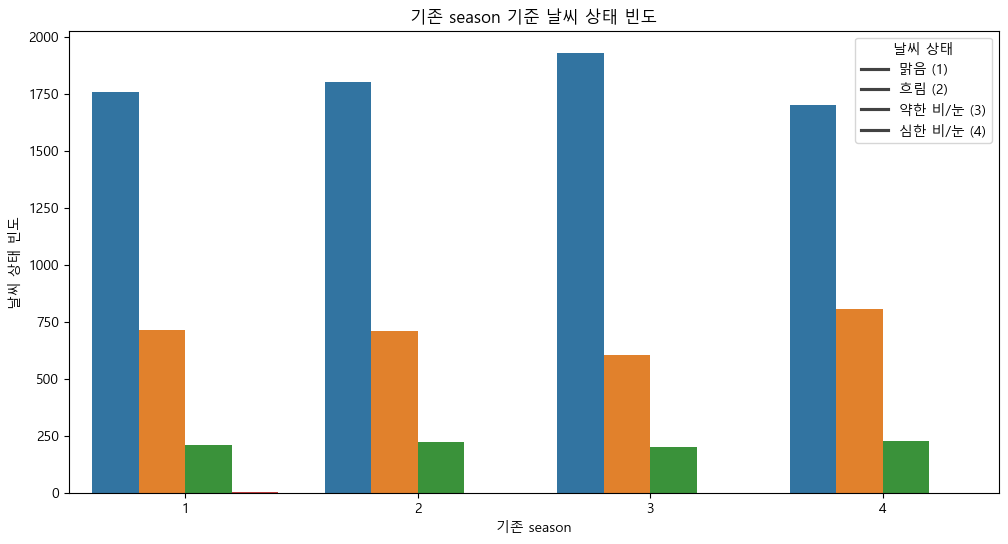

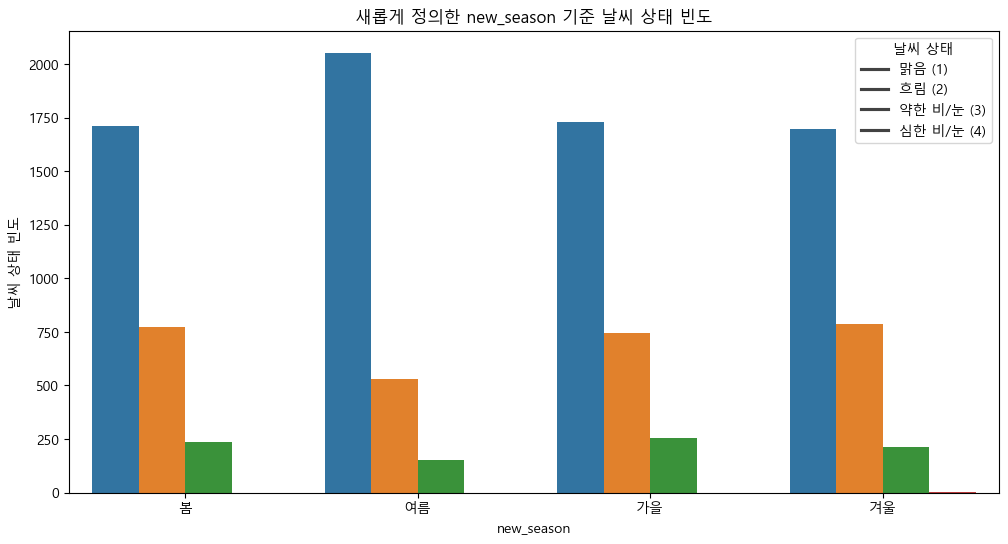

In [71]:
# 기존 season을 기준으로 날씨 상태 빈도 계산
season_weather_counts = bike_df.groupby(['season', 'weather']).size().reset_index(name='count')

# 새롭게 정의한 new_season을 기준으로 날씨 상태 빈도 계산
new_season_weather_counts = bike_df.groupby(['new_season', 'weather']).size().reset_index(name='count')

# 기존 season 기준 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', hue='weather', data=season_weather_counts, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('기존 season 기준 날씨 상태 빈도')
plt.xlabel('기존 season')
plt.ylabel('날씨 상태 빈도')
plt.legend(title='날씨 상태', labels=['맑음 (1)', '흐림 (2)', '약한 비/눈 (3)', '심한 비/눈 (4)'])
plt.show()

# 새롭게 정의한 new_season 기준 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='new_season', y='count', hue='weather', data=new_season_weather_counts, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], order=['봄', '여름', '가을', '겨울'])
plt.title('새롭게 정의한 new_season 기준 날씨 상태 빈도')
plt.xlabel('new_season')
plt.ylabel('날씨 상태 빈도')
plt.legend(title='날씨 상태', labels=['맑음 (1)', '흐림 (2)', '약한 비/눈 (3)', '심한 비/눈 (4)'])
plt.show()

날씨로 분기를 구분하기 힘듬 보편적으로 날씨가 거의 일정함 날씨보다 온도를 기준으로 확인하는게 좋아보임


C:\Users\302\AppData\Local\Temp\ipykernel_6424\3358998599.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='temp', data=season_temp_avg, palette=['#FF9999', '#FFCC99', '#99CCFF', '#CC99FF'])


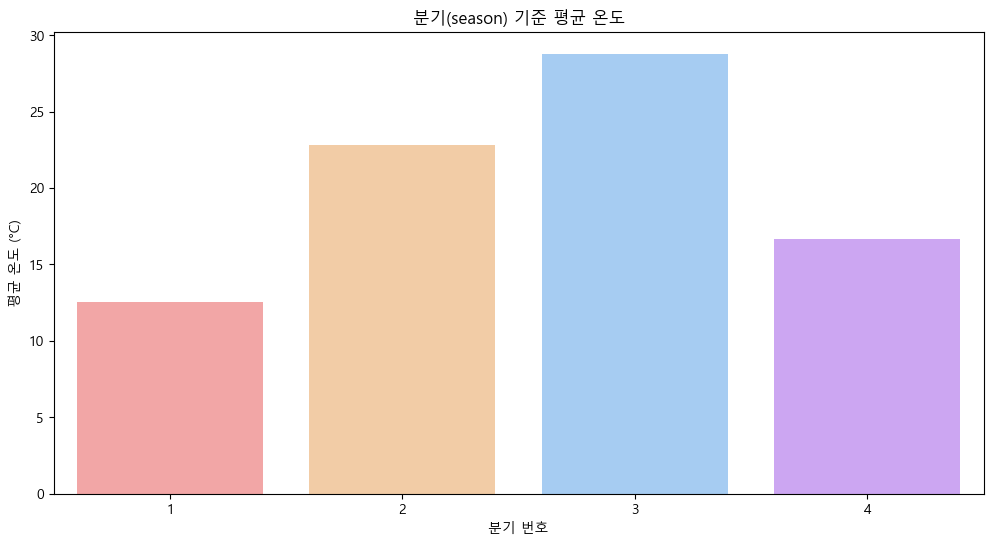

C:\Users\302\AppData\Local\Temp\ipykernel_6424\3358998599.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new_season', y='temp', data=new_season_temp_avg, palette=['#A7D49B', '#6ECFF6', '#F6A56E', '#BCC6CC'], order=['봄', '여름', '가을', '겨울'])


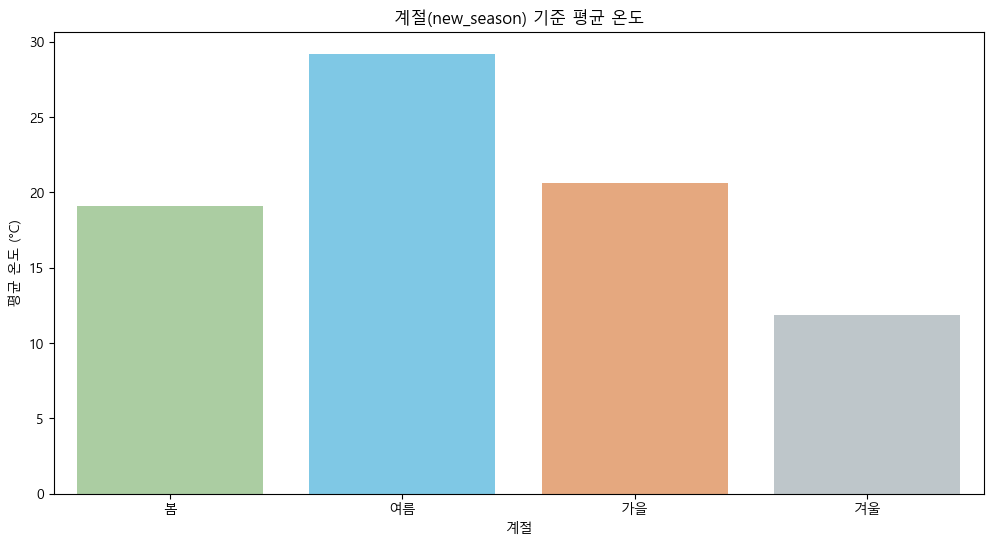

In [72]:
# 기존 season을 기준으로 평균 온도 계산
season_temp_avg = bike_df.groupby('season')['temp'].mean().reset_index()

# 새롭게 정의한 new_season을 기준으로 평균 온도 계산
new_season_temp_avg = bike_df.groupby('new_season')['temp'].mean().reset_index()

# 분기(season) 기준 그래프 (분기 번호로 표시)
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='temp', data=season_temp_avg, palette=['#FF9999', '#FFCC99', '#99CCFF', '#CC99FF'])
plt.title('분기(season) 기준 평균 온도')
plt.xlabel('분기 번호')
plt.ylabel('평균 온도 (°C)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['1', '2', '3', '4'])  # 분기 번호로 레이블 설정
plt.show()

# 계절(new_season) 기준 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='new_season', y='temp', data=new_season_temp_avg, palette=['#A7D49B', '#6ECFF6', '#F6A56E', '#BCC6CC'], order=['봄', '여름', '가을', '겨울'])
plt.title('계절(new_season) 기준 평균 온도')
plt.xlabel('계절')
plt.ylabel('평균 온도 (°C)')
plt.show()

온도와 대여량은 비례하게 움직인다.

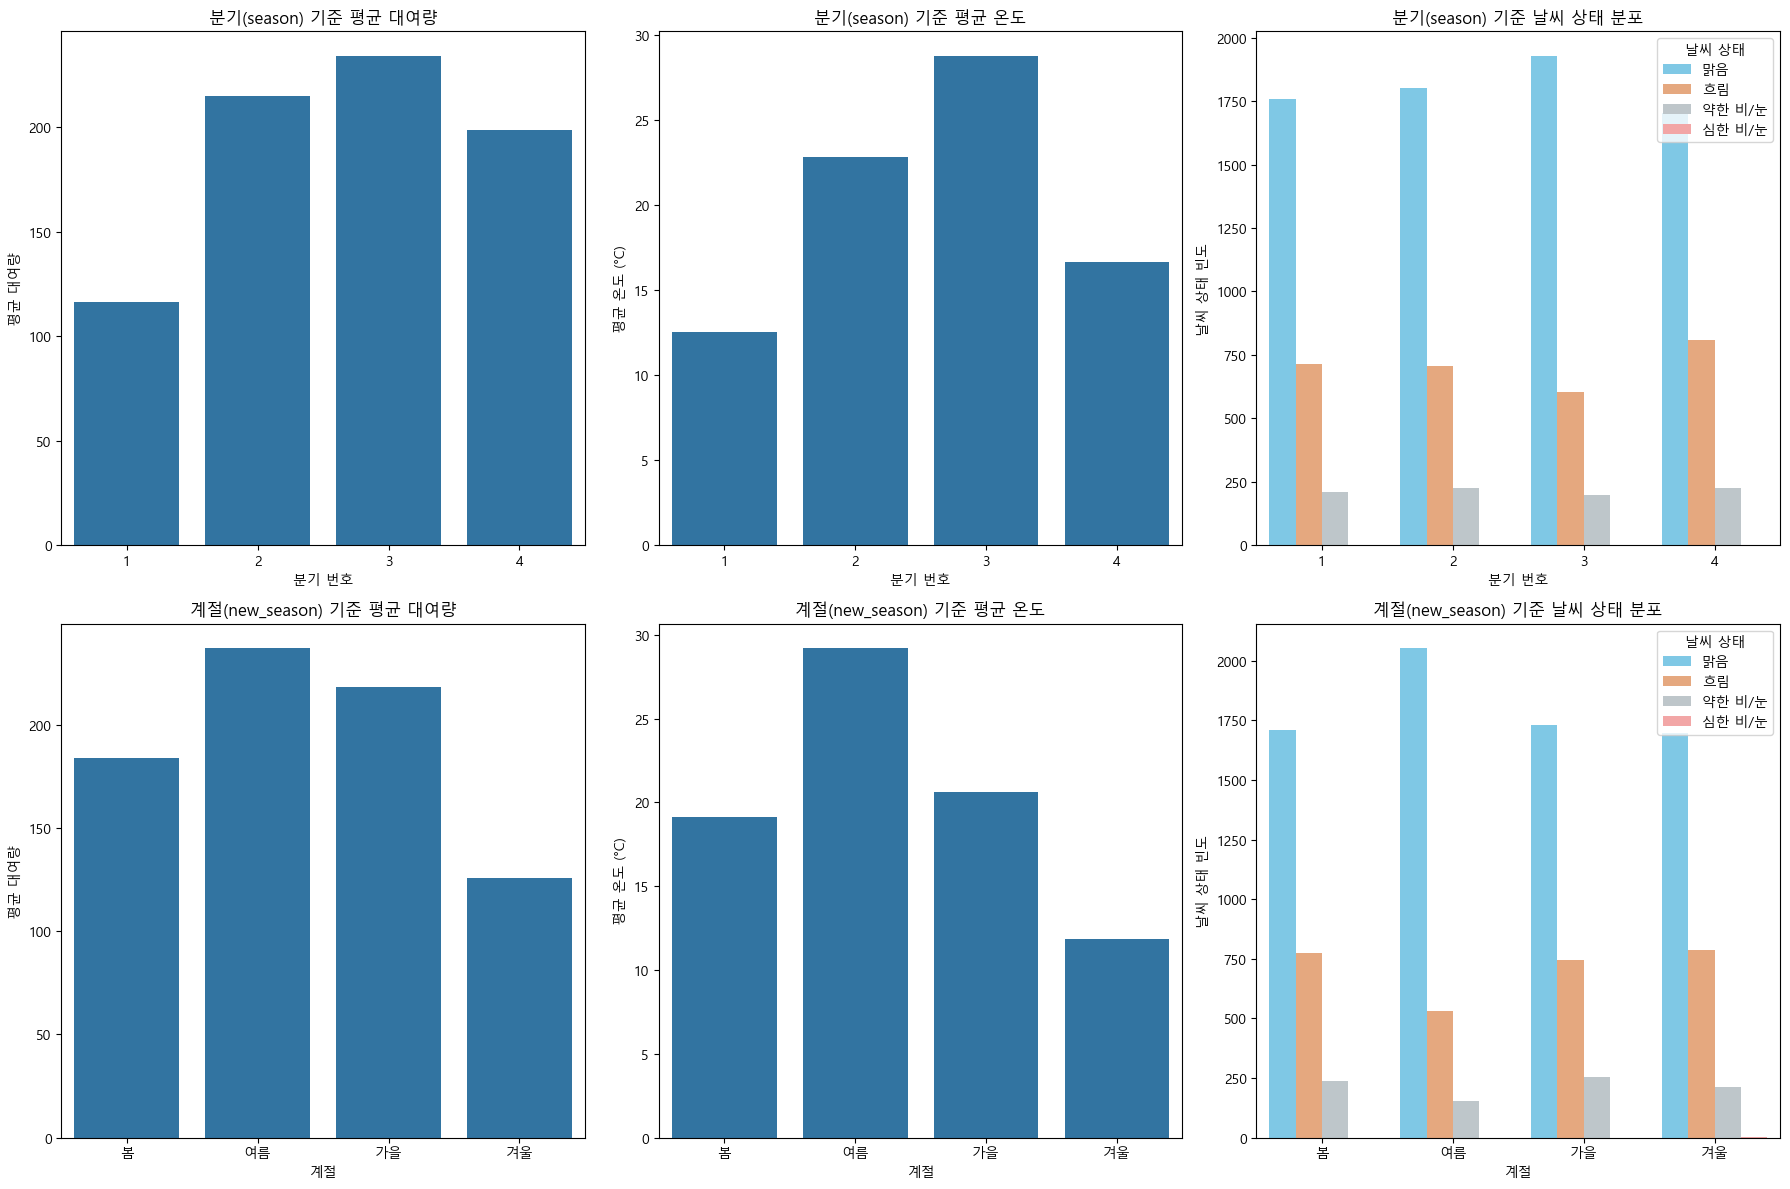

In [73]:
# 분기(season) 기준 평균 대여량과 평균 온도 계산
season_count_avg = bike_df.groupby('season')['count'].mean().reset_index()
season_temp_avg = bike_df.groupby('season')['temp'].mean().reset_index()

# 계절(new_season) 기준 평균 대여량과 평균 온도 계산
new_season_count_avg = bike_df.groupby('new_season')['count'].mean().reset_index()
new_season_temp_avg = bike_df.groupby('new_season')['temp'].mean().reset_index()

# 날씨 상태별 이름 매핑 (1: 맑음, 2: 흐림, 3: 약한 비/눈, 4: 심한 비/눈)
weather_mapping = {1: '맑음', 2: '흐림', 3: '약한 비/눈', 4: '심한 비/눈'}

# 분기(season) 기준 날씨 상태 분포 데이터 정렬
season_weather_counts = bike_df.groupby(['season', 'weather']).size().reset_index(name='count')
season_weather_counts['weather'] = season_weather_counts['weather'].map(weather_mapping)
season_weather_counts = season_weather_counts.sort_values(by=['season', 'weather'])

# 계절(new_season) 기준 날씨 상태 분포 데이터 정렬
new_season_weather_counts = bike_df.groupby(['new_season', 'weather']).size().reset_index(name='count')
new_season_weather_counts['weather'] = new_season_weather_counts['weather'].map(weather_mapping)
new_season_weather_counts = new_season_weather_counts.sort_values(by=['new_season', 'weather'])

# 그래프 크기 설정
plt.figure(figsize=(18, 12))

# 1. 분기(season) 기준 평균 대여량
plt.subplot(2, 3, 1)
sns.barplot(x='season', y='count', data=season_count_avg)
plt.title('분기(season) 기준 평균 대여량')
plt.xlabel('분기 번호')
plt.ylabel('평균 대여량')

# 2. 분기(season) 기준 평균 온도
plt.subplot(2, 3, 2)
sns.barplot(x='season', y='temp', data=season_temp_avg)
plt.title('분기(season) 기준 평균 온도')
plt.xlabel('분기 번호')
plt.ylabel('평균 온도 (°C)')

# 3. 분기(season) 기준 날씨 상태 분포
plt.subplot(2, 3, 3)
sns.barplot(x='season', y='count', hue='weather', data=season_weather_counts, palette=['#6ECFF6', '#F6A56E', '#BCC6CC', '#FF9999'], hue_order=['맑음', '흐림', '약한 비/눈', '심한 비/눈'])
plt.title('분기(season) 기준 날씨 상태 분포')
plt.xlabel('분기 번호')
plt.ylabel('날씨 상태 빈도')
plt.legend(title='날씨 상태')

# 4. 계절(new_season) 기준 평균 대여량
plt.subplot(2, 3, 4)
sns.barplot(x='new_season', y='count', data=new_season_count_avg, order=['봄', '여름', '가을', '겨울'])
plt.title('계절(new_season) 기준 평균 대여량')
plt.xlabel('계절')
plt.ylabel('평균 대여량')

# 5. 계절(new_season) 기준 평균 온도
plt.subplot(2, 3, 5)
sns.barplot(x='new_season', y='temp', data=new_season_temp_avg, order=['봄', '여름', '가을', '겨울'])
plt.title('계절(new_season) 기준 평균 온도')
plt.xlabel('계절')
plt.ylabel('평균 온도 (°C)')

# 6. 계절(new_season) 기준 날씨 상태 분포
plt.subplot(2, 3, 6)
sns.barplot(x='new_season', y='count', hue='weather', data=new_season_weather_counts, palette=['#6ECFF6', '#F6A56E', '#BCC6CC', '#FF9999'], hue_order=['맑음', '흐림', '약한 비/눈', '심한 비/눈'], order=['봄', '여름', '가을', '겨울'])
plt.title('계절(new_season) 기준 날씨 상태 분포')
plt.xlabel('계절')
plt.ylabel('날씨 상태 빈도')
plt.legend(title='날씨 상태')

# 레이아웃 조정
plt.tight_layout()
plt.show()

계절,분기에 상관없이 날씨는 일정하다. 대여량은 온도에 영향을 많이 받는다.

In [74]:
# 계절 정보를 숫자형태로 변환
bike_df['new_season'] = bike_df['new_season'].map({'봄': 0, '여름': 1, '가을': 2, '겨울': 3})

c:\Users\302\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\302\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


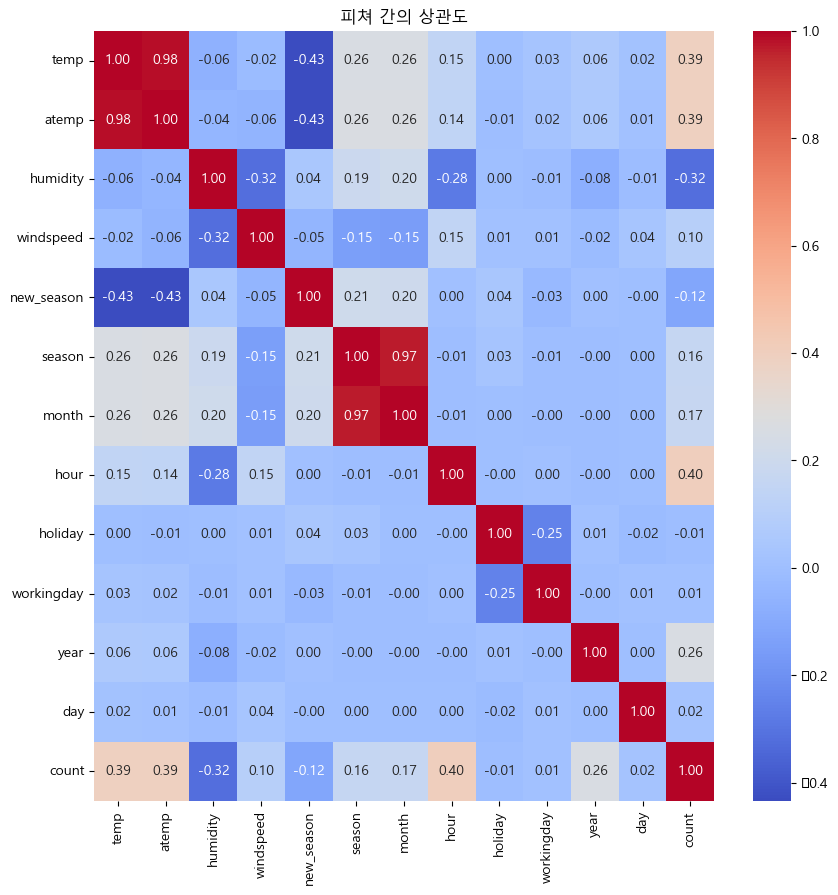

In [75]:
# 피쳐 간의 상관도를 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(bike_df[['temp', 'atemp', 'humidity', 'windspeed', 'new_season','season','month','hour','holiday','workingday','year','day','count']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('피쳐 간의 상관도')
plt.show()



In [ ]:
# 실제 상관 관계 분석 시 계절이고 분기고 어차피 더 자세히 나온 month가 있었는데 둘다 삭제하자 라는 생각을 너무 늦게함. <-- 그냥 미세한 차이일뿐 같은 정보를 가지고 있음.
# 온도,체감온도,시간은 양의 상관계수를 가지고 있으며, 습도와 풍속은 음의 상관계수를 가지고 있다.
# 온도와 체감온도는 0.98로 매우 높은 상관도를 가지고 있으므로 하나의 피처는 삭제하는 것으로 보인다. 같은 이유로 season과 new_season도 삭제 
# 연도 정보는 연도별로 대여량이 증가하고 있으므로 유의미한 피처로 판단된다. 단순 작년대비 올해가 더 높다고 쉽게 판단하기 어려워보임.
# 휴일과 워킹데이 day 는 상관도가 매우 낮으므로 삭제하는 것이 좋다.


In [ ]:
#필요 없는 열 제거
drop_columns = ['atemp','season','day','new_season','holiday','workingday','year']
bike_df.drop(drop_columns, axis=1,inplace=True)
#제거 후 확인
bike_df.head(3)

weather  temp  humidity  windspeed  count  month  hour
0        1  9.84        81        0.0     16      1     0
1        1  9.02        80        0.0     40      1     1
2        1  9.02        80        0.0     32      1     2

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE(Root Mean Squared Logarithmic Error) 계산, 예측값과 실제값의 로그를 취한 후 제곱한 값의 평균을 계산하고 제곱근을 취하여 구함
# 로그 함수를 사용하여 비율을 계산하므로 상대적인 크기 차이가 작은 예측 오류에 민감하게 반응. 큰 오류를 상대적으로 덜 강조. 양수 값이 크게 다르고 정확한 예측보다는 상대적인 예측이 중요한 경우 적용
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

### 로그 변환, 피처 인코딩, 모델 학습/예측/평가

In [78]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.193, RMSE: 147.308, MAE: 108.734


In [79]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)


      real_count  predicted_count   diff
1618         890            278.0  612.0
3151         798            196.0  602.0
966          884            283.0  601.0
412          745            150.0  595.0
2314         766            175.0  591.0


In [80]:
y_target.hist()

<Axes: >

In [81]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

<Axes: >

In [95]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.2, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)


RMSLE: 1.056, RMSE: 168.824, MAE: 113.465


In [83]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')

In [84]:
X_features

weather   temp  humidity  windspeed  month  hour
0            1   9.84        81     0.0000      1     0
1            1   9.02        80     0.0000      1     1
2            1   9.02        80     0.0000      1     2
3            1   9.84        75     0.0000      1     3
4            1   9.84        75     0.0000      1     4
...        ...    ...       ...        ...    ...   ...
10881        1  15.58        50    26.0027     12    19
10882        1  14.76        57    15.0013     12    20
10883        1  13.94        61    15.0013     12    21
10884        1  13.94        61     6.0032     12    22
10885        1  13.12        66     8.9981     12    23

[10886 rows x 6 columns]

In [96]:
# 'month', 'hour','weather' 등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=[ 'month', 'hour','weather'], drop_first=True)

In [97]:
X_features_ohe

temp  humidity  windspeed  month_2  month_3  month_4  month_5  \
0       9.84        81     0.0000    False    False    False    False   
1       9.02        80     0.0000    False    False    False    False   
2       9.02        80     0.0000    False    False    False    False   
3       9.84        75     0.0000    False    False    False    False   
4       9.84        75     0.0000    False    False    False    False   
...      ...       ...        ...      ...      ...      ...      ...   
10881  15.58        50    26.0027    False    False    False    False   
10882  14.76        57    15.0013    False    False    False    False   
10883  13.94        61    15.0013    False    False    False    False   
10884  13.94        61     6.0032    False    False    False    False   
10885  13.12        66     8.9981    False    False    False    False   

       month_6  month_7  month_8  ...  hour_17  hour_18  hour_19  hour_20  \
0        False    False    False  ...    False    False    False    False   
1        False    False    False  ...    False    False    False    False   
2        False    False    False  ...    False    False    False    False   
3        False    False    False  ...    False    False    False    False   
4        False    False    False  ...    False    False    False    False   
...        ...      ...      ...  ...      ...      ...      ...      ...   
10881    False    False    False  ...    False    False     True    False   
10882    False    False    False  ...    False    False    False     True   
10883    False    False    False  ...    False    False    False    False   
10884    False    False    False  ...    False    False    False    False   
10885    False    False    False  ...    False    False    False    False   

       hour_21  hour_22  hour_23  weather_2  weather_3  weather_4  
0        False    False    False      False      False      False  
1        False    False    False      False      False      False  
2        False    False    False      False      False      False  
3        False    False    False      False      False      False  
4        False    False    False      False      False      False  
...        ...      ...      ...        ...        ...        ...  
10881    False    False    False      False      False      False  
10882    False    False    False      False      False      False  
10883     True    False    False      False      False      False  
10884    False     True    False      False      False      False  
10885    False    False     True      False      False      False  

[10886 rows x 40 columns]

In [98]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)


### LinearRegression ###
RMSLE: 0.641, RMSE: 111.683, MAE: 72.210
### Ridge ###
RMSLE: 0.647, RMSE: 113.736, MAE: 73.091
### Lasso ###
RMSLE: 0.721, RMSE: 129.254, MAE: 83.292


In [99]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

<Axes: ylabel='None'>

In [100]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.686, RMSE: 114.853, MAE: 73.191
### GradientBoostingRegressor ###
RMSLE: 0.653, RMSE: 109.712, MAE: 71.020
### XGBRegressor ###
RMSLE: 0.714, RMSE: 124.438, MAE: 78.643
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 39
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.643, RMSE: 109.783, MAE: 69.885


In [118]:
# 테스트 데이터 불러오기
test = pd.read_csv('test.csv')

# datetime 열 별도로 저장
datetime_col = test['datetime']

# 테스트 데이터 전처리
test['year'] = test['datetime'].apply(lambda x: int(x[:4]))
test['month'] = test['datetime'].apply(lambda x: int(x[5:7]))
test['day'] = test['datetime'].apply(lambda x: int(x[8:10]))
test['hour'] = test['datetime'].apply(lambda x: int(x[11:13]))

# 필요 없는 열 제거 (datetime 삭제)
test = test.drop(['datetime', 'season', 'atemp', 'day', 'holiday', 'workingday', 'year'], axis=1)

# One-Hot Encoding 적용 (학습 데이터와 동일한 열 구조 유지)
test_ohe = pd.get_dummies(test, columns=['month', 'hour', 'weather'], drop_first=True)

# 학습 데이터와 동일한 열 구조로 맞추기
missing_cols = set(X_features_ohe.columns) - set(test_ohe.columns)
for col in missing_cols:
    test_ohe[col] = 0  # 없는 열은 0으로 채움
test_ohe = test_ohe[X_features_ohe.columns]  # 열 순서 맞추기

# 모델 예측
pred = model.predict(test_ohe)

print(type(model))

# 로그 변환된 값을 원래 스케일로 복원
pred_expm1 = np.expm1(pred)

# 제출 파일 생성
submission = pd.DataFrame({'datetime': datetime_col, 'count': pred_expm1})
submission.to_csv('submission.csv', index=False)

print("제출 파일 'submission.csv'가 생성되었습니다.")

<class 'lightgbm.sklearn.LGBMRegressor'>
제출 파일 'submission.csv'가 생성되었습니다.
